# Waves Forecasting for Wave Energy Converters Using Bi-Directional LSTM Networks
## EECS MSc Project  

**Student Name**:  Anna Burlingsby  
**Student ID**:  210900587

## Importing Data and Exploratory Data Analysis (Notebook 1/5)

The purpose of this notebook is to show some exploratory data analysis (EDA) including visualisations regarding wave data.

 1. Load in the data.
 2. Read basic information about the data e.g. dimensions, missing data.
 3. Some basic visualisations.

In [ ]:
# Setting up google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys, glob
sys.path.append('/content/gdrive/MyDrive/')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Set useful global formatting parameters for plots.
plt.rcParams['axes.linewidth'] = 2 #set the value globally
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

## Data loading

The raw data is in a '.nc' file. The below code was run once at the beginning of the project to convert the file into the more easily manipulatable '.csv' file format.  

The code has been preserved, but commented out below for posterity, and to enable checking.  

First, the 'netCDF' library is installed, and the relevant imports occur.

In [ ]:
# !pip install netCDF4
# import netCDF4
# import xarray as xr

The data is loaded in from the '.nc' file, and the titles of the variables are printed.

In [ ]:
# sample_path = '/content/gdrive/MyDrive/Anna_Burlingsby_Project/Dataset/HCtimeseries_aus_4m_114.80E_33.50S.nc'
# nc_data = netCDF4.Dataset(sample_path, 'r')
# nc_data.variables.keys()

This is indicating that there are 6 variables, including 'time' which all the others are set against. The data is two-dimensional.

Below, more information about each variable is printed, including:
- Long name
- Standard name
- Units
- Conventions
- Valid maximum
- Shape.

In [ ]:
# for d in nc_data.variables.items():
#   print(d)
#   print('\n')

The variables are:
- 'time', in Julian days.
- 'hs', which is the significant height of wind and swell waves, in $m$.
- 'tm01', which is the mean wave period Tm01, in $s$.
- 'fp', which is wave peak frequency, in $s^{-1}$.
- 'tm0m1', which is wave energy period Tm0-1, in $s$.
- 'dir', which is mean wave direction, in $^\circ$.

Below, the data is converted into a pandas dataframe.

In [ ]:
# ds = xr.open_dataset(sample_path)
# df = ds.to_dataframe()
# df

Now it is made into a '.csv' file so all the above isn't necessary every time.

In [ ]:
# df.to_csv('/content/gdrive/MyDrive/Anna_Burlingsby_Project/Dataset/Anna_HCtimeseries_aus_4m_114.80E_33.50S.csv')

## Data reloading

Data is loaded back in from the created '.csv' file. The index is set as a Pandas DateTimeIndex, with a period of 'hourly'.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Anna_Burlingsby_Project/Dataset/Anna_HCtimeseries_aus_4m_114.80E_33.50S.csv', index_col='time')
df.index = pd.to_datetime(df.index).round(freq='H')
df = df.asfreq('H')
df.head()

,hs,tm01,fp,tm0m1,dir
time,,,,,
1979-01-01 00:00:00,0.000,-32767.00,-32767.000,-32767.00,-32767.000000
1979-01-01 01:00:00,0.264,1.68,-32767.000,1.68,122.900002
1979-01-01 02:00:00,0.314,2.25,0.397,2.25,127.200005
1979-01-01 03:00:00,0.306,2.39,0.389,2.39,134.400009
1979-01-01 04:00:00,0.312,2.43,0.386,2.43,145.199997


The first 2 rows of the data appear to contain errors, so these will be removed from the dataset. Of the columns, only 'hs', 'tm01', and 'dir' will be kept, as these are the relevant predictor variables ('fp' is the inverse of 'tm01', and 'tm0m1' appears to be identical to tm01).

In [ ]:
df = df.iloc[2:].loc[:, ['hs', 'tm01', 'dir']]

The variables are:
- 'time', in Julian days.
- 'hs', which is the significant height of wind and swell waves, in $m$.
- 'tm01', which is the mean wave period Tm01, in $s$.
- 'fp', which is wave peak frequency, in $s^{-1}$.
- 'tm0m1', which is wave energy period Tm0-1, in $s$.
- 'dir', which is mean wave direction, in $^\circ$.

## Exploratory data analysis

General statistics about the data and their distributions are shown below.

In [ ]:
df.describe()

,hs,tm01,dir
count,280510.000000,280510.000000,280510.000000
mean,2.809872,11.059950,233.333000
std,1.104731,1.614214,18.414593
min,0.306000,2.250000,0.500000
25%,2.026000,9.950000,223.400009
50%,2.554000,11.050000,231.100006
75%,3.344000,12.160000,240.100006
max,9.278001,18.859999,360.000000


To take a closer look at the patterns of the data, a snapshot of 2 years will be used. To ease the plotting, a column for the day of the year will be added.

In [ ]:
df_09 = df.loc["2009-01-01":"2010-12-31"]
days_730 = [day / 24 for day in range(730*24)]
df_09["day"] = days_730
df_09.describe()

<ipython-input-11-a84556a7c11c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_09["day"] = days_730


,hs,tm01,dir,day
count,17520.000000,17520.000000,17520.000000,17520.000000
mean,2.715165,11.101464,230.700996,364.979167
std,1.050499,1.675030,17.245771,210.738862
min,0.808000,6.270000,2.200000,0.000000
25%,2.030000,9.950000,222.400009,182.489583
50%,2.486000,11.130000,229.199997,364.979167
75%,3.148000,12.240000,237.100006,547.468750
max,8.796000,17.199999,356.800018,729.958333


### Graphing the data

The time series data for the 2 years is plotted for each predictor variable:

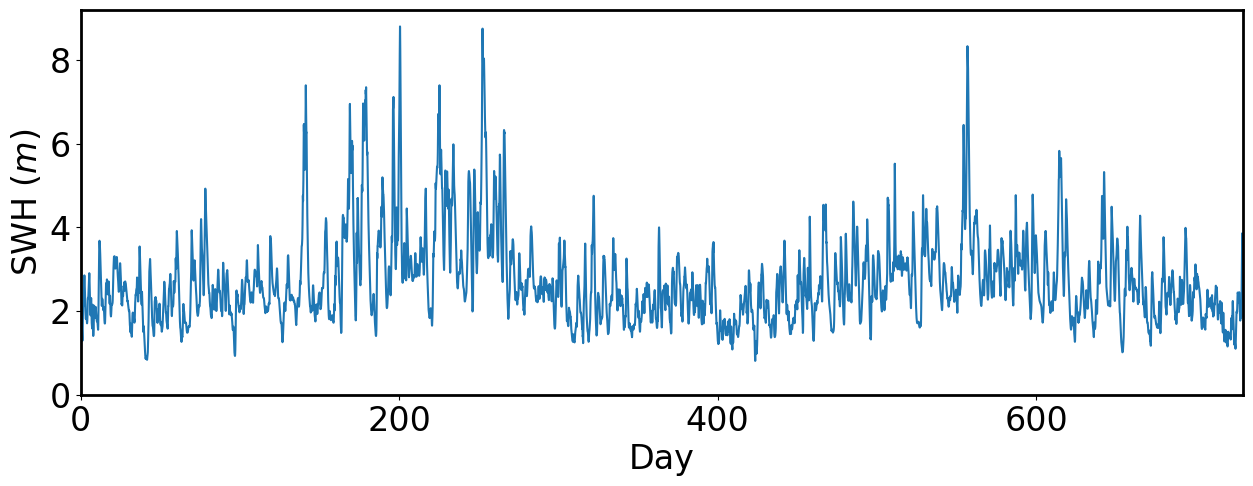

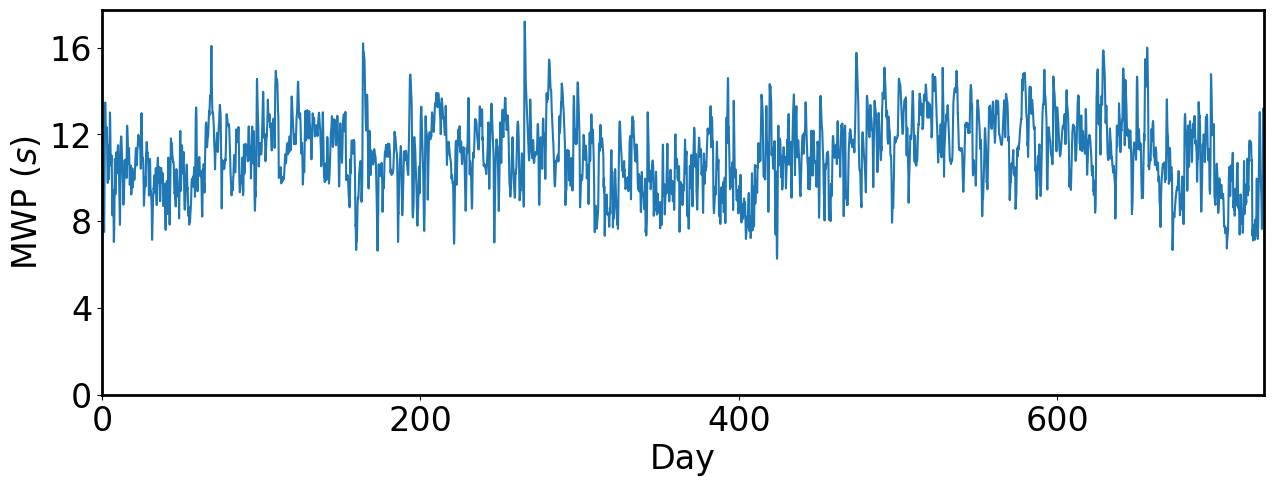

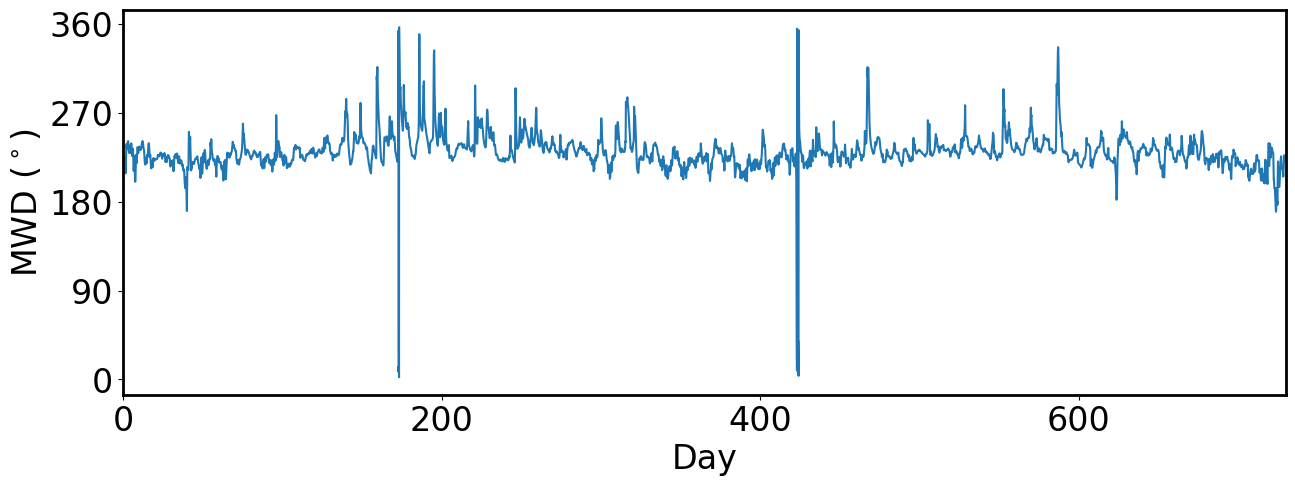

In [ ]:
for col in df_09.columns:
  if col == 'hs':
    unit = "SWH $(m)$"
    ax_lim = [0, 2, 4, 6, 8]
  elif col == 'tm01':
    unit = "MWP $(s)$"
    ax_lim = [0, 4, 8, 12, 16]
  elif col == 'dir':
    unit = "MWD $(^\circ)$"
    ax_lim = [0, 90, 180, 270, 360]
  elif col == 'day':
    break
  ax = df_09.plot(x="day", y=col, figsize=(15,5), legend=False, xlim=(0, 730))
  plt.xlabel("Day", fontsize=24)
  plt.ylabel(unit, fontsize=24)
  plt.locator_params(axis='x', nbins=5)
  plt.yticks(ax_lim)
  plt.show()

### Histograms

The distribution of values in the series are shown below.

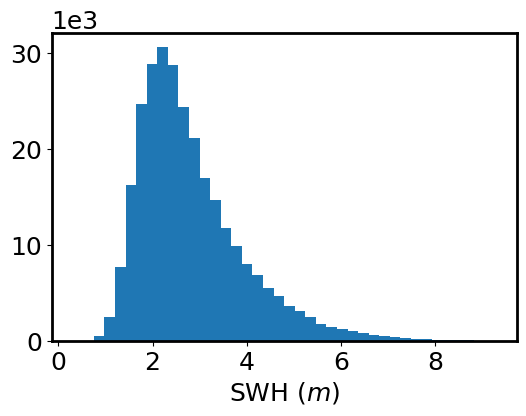

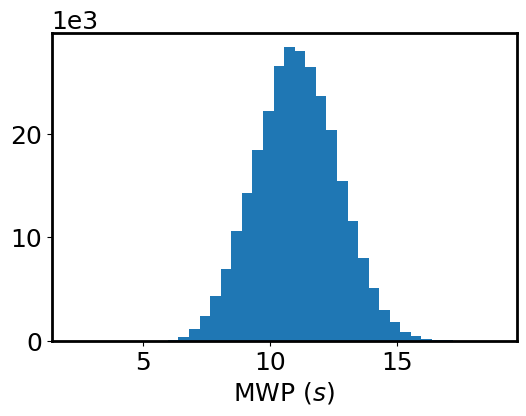

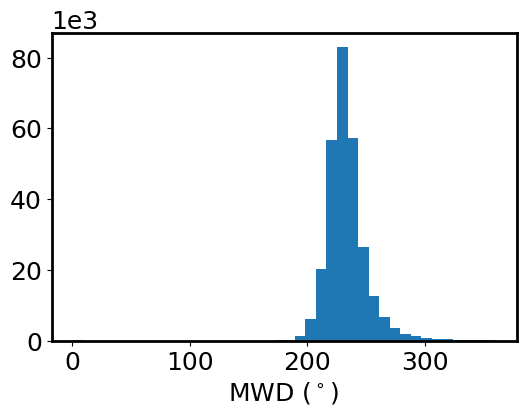

In [ ]:
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
for col in df.columns:
  df.hist(column=col, figsize=(6,4), bins=40, grid=False)
  plt.title('')
  plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
  if col == 'hs':
    unit = r"SWH $(m)$"
  elif col == 'tm01':
    unit = r"MWP $(s)$"
  elif col == 'dir':
    unit = r"MWD $(^\circ)$"
  plt.xlabel(unit, fontsize=18)
  plt.locator_params(axis='x', nbins=5)
  plt.locator_params(axis='y', nbins=5, tight=True)
  plt.show()

The range of 150 to 360 will be plotted again to get the actual shape for direction.

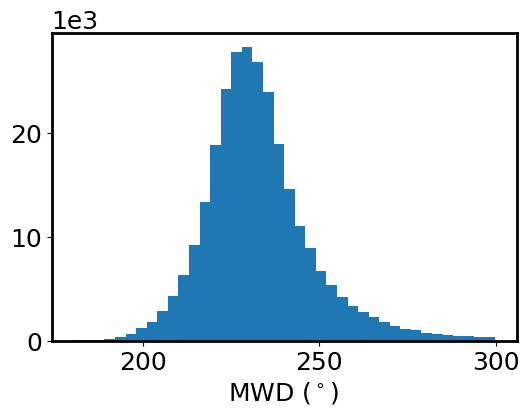

In [ ]:
df.loc[(df['dir'] > 180) & (df['dir'] < 300)].hist(column='dir', figsize=(6,4), bins=40, grid=False)
plt.title('')
unit = r"MWD $(^\circ)$"
plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
plt.xlabel(unit, fontsize=18)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.show()

**Significant wave height**

The significant wave height data has a positive skew, i.e. mostly lower values with some higher. This means that standardizing the data would likely cause the network to have problems. Min-max normalisation is likely a better fit for this data.

**Wave period**

The period data seems to fit a gaussian distribution pretty well, and therefore is a good candidate for standardisation.

**Direction**

The direction data is all in the range 0-360, and doesn't seem like it fits a gaussian that well. There is the additional complication that the 0 and 360 angles are a lot closer to each other than the data suggests. An opportunity exists to use a function to transform this data with a function such as sine. The sine function would give 0$^{\circ}$, 180$^{\circ}$ and 360$^{\circ}$ the same value, which could cause problems - a modulus of the sine function could give better results. This does depend on the desired use of the data however. If the actual direction is particularly significant, the sine function would lose some data.

The direction data should be more closely inspected for the actual values occurring:

In [ ]:
df['dir'].mean()

233.33299999524684

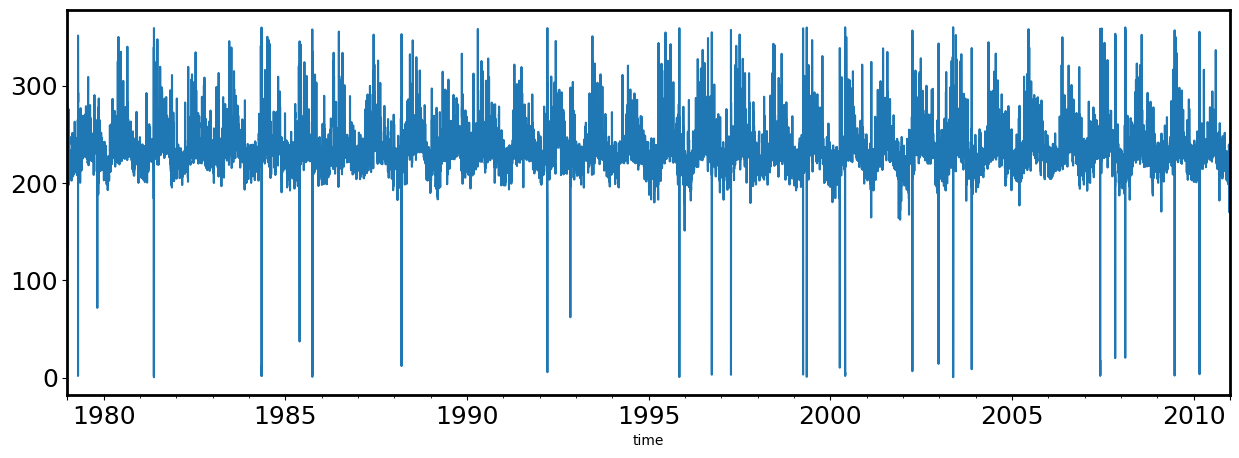

In [ ]:
df.dir.plot(figsize=(15,5));

In [ ]:
angle = 90
small_angles = len(df[df.dir<angle])
size = len(df)
print(f"Number of values less than {angle} degrees:", small_angles)
print("Total size of dataset:", size)
print(f"Percentage of values less than {angle} degrees: {small_angles/size*100:.4f} %")

Number of values less than 90 degrees: 197
Total size of dataset: 280510
Percentage of values less than 90 degrees: 0.0702 %


### Sine transformation of direction data

In [ ]:
start_date = '2009-06-01'
end_date = '2009-06-30'
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

<ipython-input-19-cf586cd7fb61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30["day"] = days_30


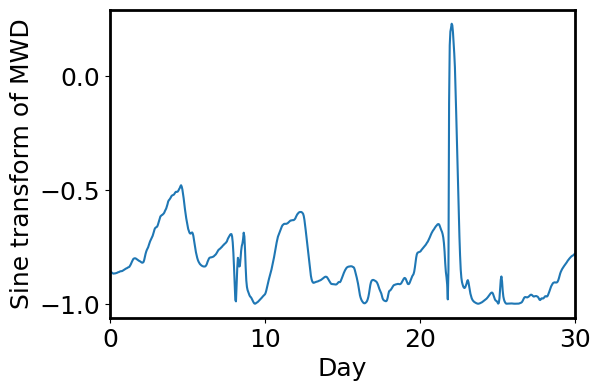

In [ ]:
df_30 = df.loc[start_date:end_date]
days_30 = [day / 24 for day in range(0, 30*24)]
df_30["day"] = days_30
df_sine = np.sin(np.radians(df_30.dir))
df_sine.rename("sine", inplace=True)
df_sine = df_sine.to_frame()
df_sine["day"] = days_30
df_sine.plot(x="day", y="sine", figsize=(6,4), legend=False, xlim=(0,30))
plt.xlabel("Day", fontsize=18)
plt.ylabel("Sine transform of MWD", fontsize=18)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

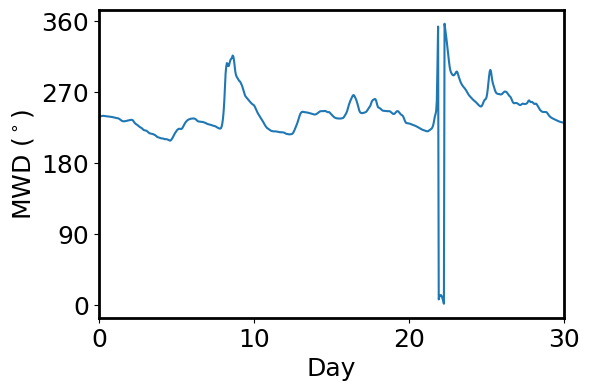

In [ ]:
unit = "MWD $(^\circ)$"
ax_lim = [0, 90, 180, 270, 360]
df_plot = df.dir.loc[start_date:end_date].to_frame()
df_plot["day"] = days_30
df_plot.plot(x="day", y= "dir", figsize=(6,4), legend=False, xlim=(0,30))
plt.xlabel("Day", fontsize=18)
plt.ylabel(unit, fontsize=18)
plt.locator_params(axis='x', nbins=5)
plt.yticks(ax_lim)
plt.show()

## Smoothing the data with rolling averages

### 8 hour window

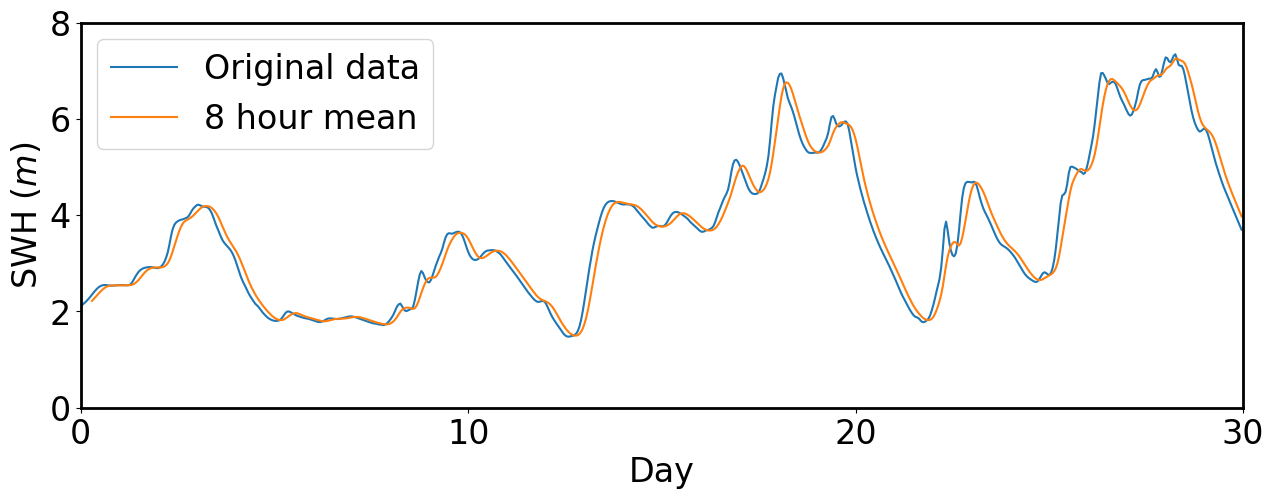

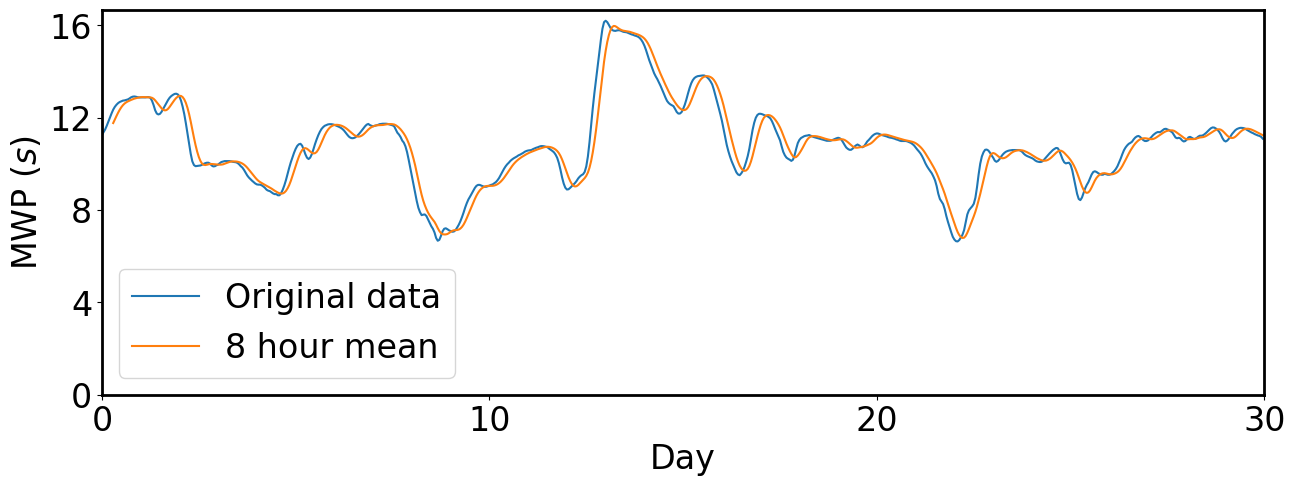

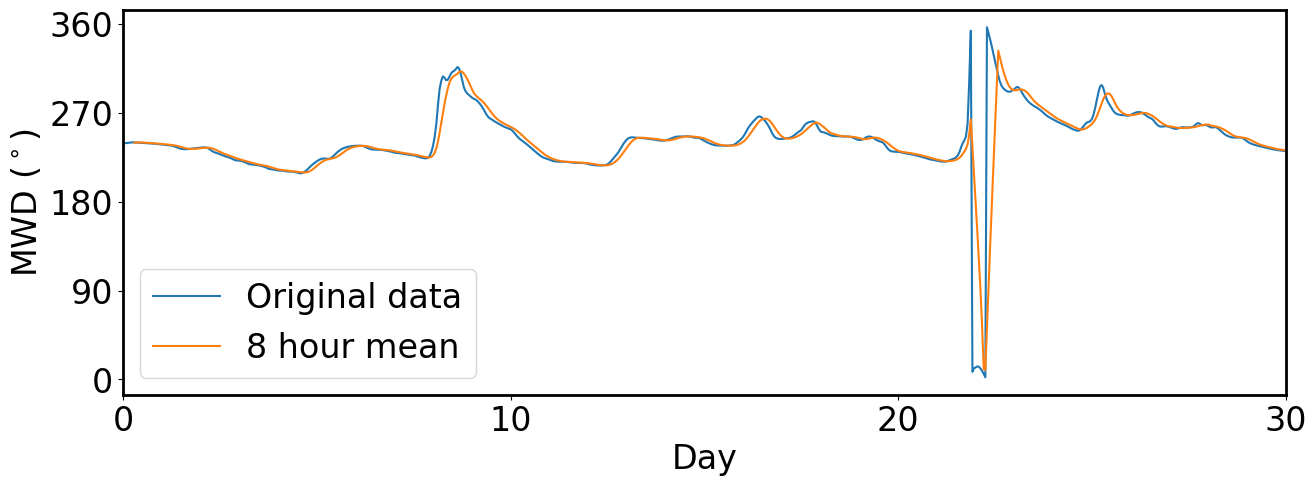

In [ ]:
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('legend', fontsize=24)
window = 8
for col in df_30.columns:
  if col == 'hs':
    unit = "SWH $(m)$"
    ax_lim = [0, 2, 4, 6, 8]
  elif col == 'tm01':
    unit = "MWP $(s)$"
    ax_lim = [0, 4, 8, 12, 16]
  elif col == 'dir':
    unit = "MWD $(^\circ)$"
    ax_lim = [0, 90, 180, 270, 360]
  elif col == "day":
    break
  rolling = df_30.loc[:, col].rolling(window).mean()
  rolling = rolling.rename(f"{window} hour mean").to_frame()
  rolling["day"] = days_30
  rolling["Original data"] = df_30[col]
  # Order the columns to leave colouring consistent.
  rolling = rolling[["day", "Original data", f"{window} hour mean"]]
  rolling.plot(x="day", figsize=(15,5), legend=True, xlim=(0,30))
  plt.ylabel(unit, fontsize=24)
  plt.xlabel("Day", fontsize=24)
  plt.locator_params(axis='x', nbins=5)
  plt.yticks(ax_lim)
  plt.show()

## Plot 2 years of the 24 hour rolling average

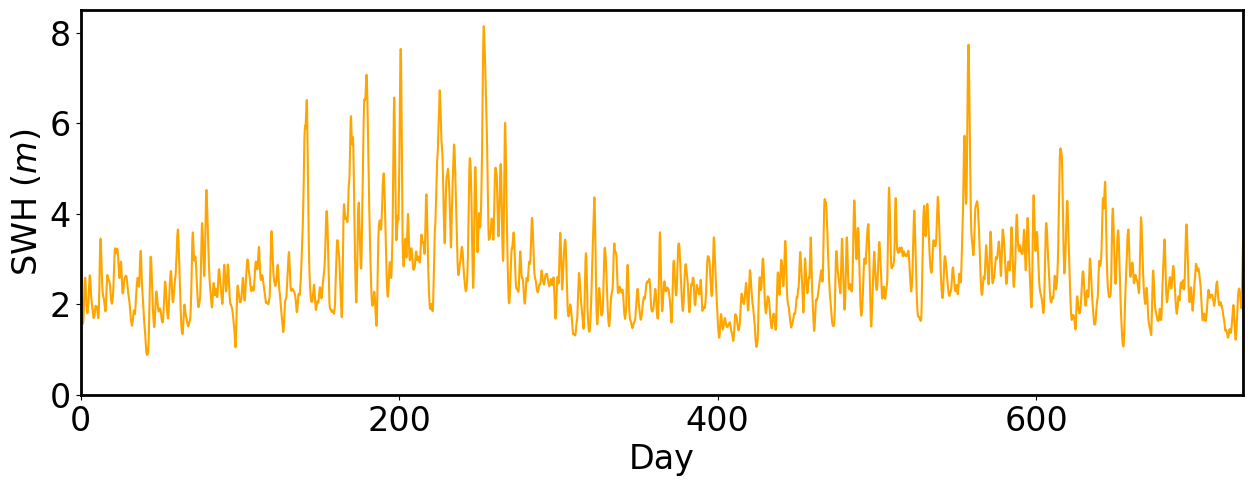

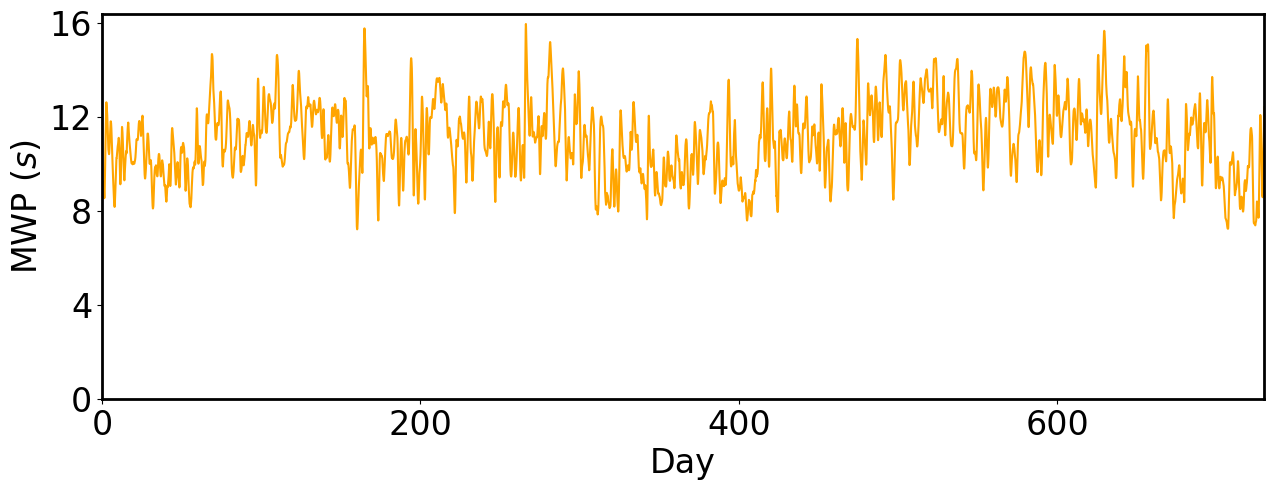

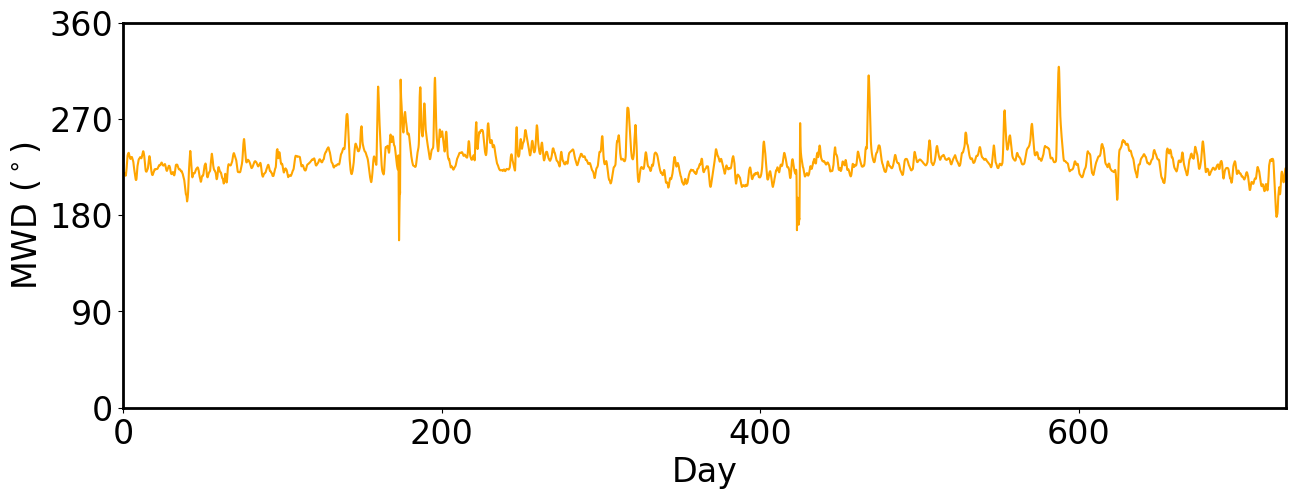

In [ ]:
start_date = "2009-01-01"
end_date = "2010-12-31"
window = 24
for col in df_09.columns:
  if col == 'hs':
    unit = "SWH $(m)$"
    ax_lim = [0, 2, 4, 6, 8]
  elif col == 'tm01':
    unit = "MWP $(s)$"
    ax_lim = [0, 4, 8, 12, 16]
  elif col == 'dir':
    unit = "MWD $(^\circ)$"
    ax_lim = [0, 90, 180, 270, 360]
  elif col == "day":
    break
  rolling = df_09[col].rolling(window).mean().rename(col).to_frame()
  rolling["day"] = days_730
  rolling.plot(x="day", y=col, figsize=(15,5), legend=False, xlim=(0,730),
               color='orange')
  plt.ylabel(unit, fontsize=24)
  plt.xlabel("Day", fontsize=24)
  plt.locator_params(axis='x', nbins=5)
  plt.yticks(ax_lim)
  plt.show()